In [6]:
#1. vẽ biểu đồ cột cho neighborhood group
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


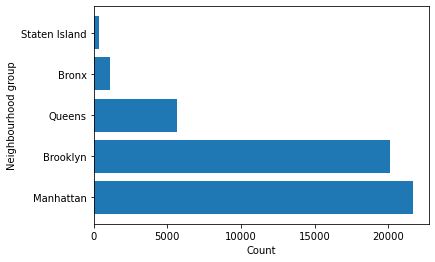

In [4]:
x = list(df.neighbourhood_group.value_counts().keys())
y = list(df.neighbourhood_group.value_counts())
plt.barh(x, y)
plt.xlabel('Count')
plt.ylabel('Neighbourhood group')
plt.show()

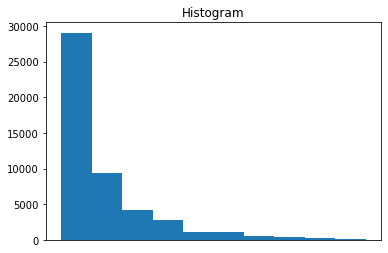

In [7]:
#2. tạo histogram cho neighbourhood
plt.hist(df.neighbourhood)
plt.title('Histogram')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
plt.show()

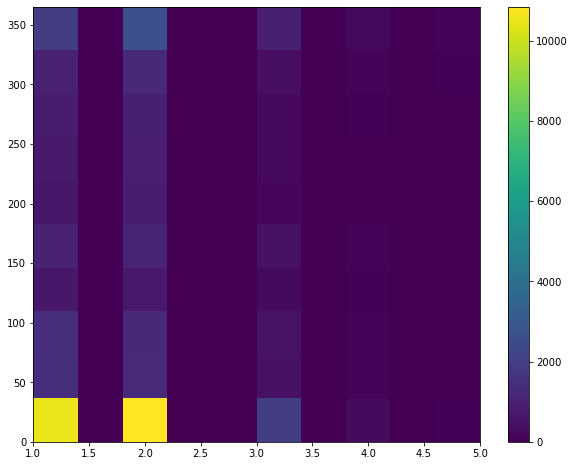

In [11]:
#3. Biểu diễn mối liên hệ giữa neighbourgroup và Availability của các phòng
df3 = df.copy()
df3['neighbourhood_group'].replace({'Brooklyn':1, 'Manhattan':2, 'Queens':3, 'Bronx':4, 'Staten Island':5},inplace = True)
h = plt.hist2d(x = df3['neighbourhood_group'], y = df3['availability_365'])
plt.colorbar(h[3])
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [14]:
#4. Vẽ bản đồ (scatter plot) của neighborhood dựa theo tọa độ lat lon
import plotly.express as px

fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="neighbourhood")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

C:\Users\khanh\AppData\Local\Temp\ipykernel_6804\961759115.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(corr.columns)


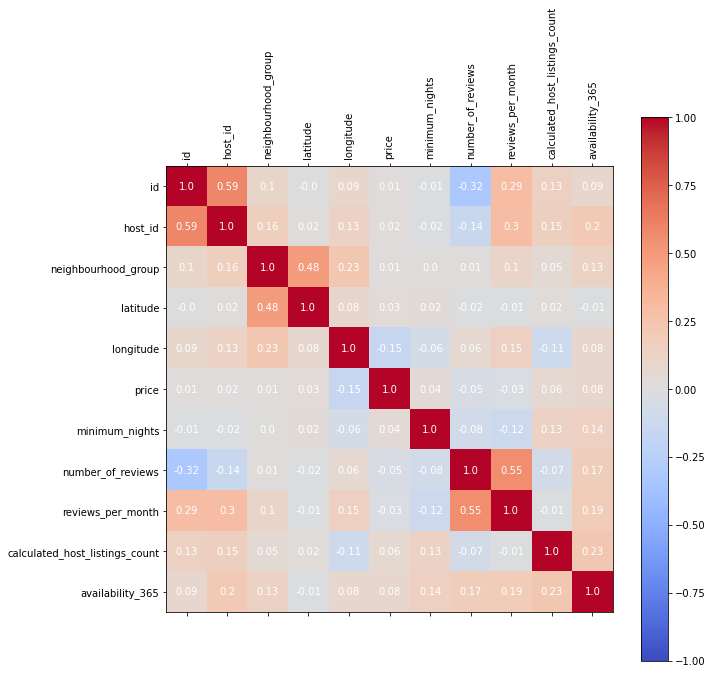

In [14]:
#5. Sử dụng heatmap để biểu diễn mối quan hệ (correlation) giữa tất cả các thuộc tính trong dữ liệu
import numpy as np
corr = df3.corr()
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(corr.columns)
ax.set_yticks(ticks)
for i in range(11):
     for j in range(11):
         text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")
plt.show()
